In [ ]:
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.__version__)
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import ns
import history_cmc as hic
import math
import scipy
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
import random
from random import shuffle
import json

import ecc_calc as gwcalc
import unit_convert as uc
import merger_rate_calculator as mr
import ns_tidalcapture as tc


%matplotlib inline

matplotlib.rcParams.update({'font.size': 24})
      
twopi=2.*np.pi
yearsc=3.1557*10**7
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
Gconst_sun = 4.30091*10**-3 ##pc*M_sun**-1*(km/s)2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
AU_Rsun=214.93946938362 ##AU to R_sun
PC=3.086*10**18  ##cm
PC_Rsun = 44334448.0068964 ##pc to R_sun

savepath='/projects/b1095/syr904/projects/PULSAR2/tc_comparison/'

In [2]:
def addColorbar(
    ax,cmap,
    vmin,vmax,
    label,logflag = 0,
    fontsize=16,cmap_number=0,
    tick_tuple=None):
    if logflag:
        from matplotlib.colors import LogNorm as norm
        ticks = np.linspace(np.log10(vmin),np.log10(vmax),5,endpoint=True)
        tick_labels= [r"$10^{%.1f}$"%tick for tick in ticks]
        ticks = 10**ticks
    else:
        from matplotlib.colors import Normalize as norm
        ticks = np.linspace(vmin,vmax,5,endpoint=True)
        tick_labels= ticks
    
    if tick_tuple is not None:
        ticks,tick_labels = tick_tuple

    fig = ax.get_figure()
    
    ## x,y of bottom left corner, width,height in percentage of figure size
    ## matches the default aspect ratio of matplotlib
    cur_size = fig.get_size_inches()*fig.dpi        

    cur_height = cur_size[1]
    cur_width = cur_size[0]
    offset = 0.00 + cmap_number*(25/cur_width+50/cur_width)

    ax1 = fig.add_axes([0.95 + offset, 0.125, 25./cur_width, 0.75])

    cb1 = matplotlib.colorbar.ColorbarBase(
        ax1, cmap=cmap,
        #extend='both',
        extendfrac=0.05,
        norm=norm(vmin=vmin,vmax=vmax),
        orientation='vertical')


    cb1.set_label(label,fontsize=fontsize)

    cb1.set_ticks(ticks)
    cb1.set_ticklabels(tick_labels)
    cb1.ax.tick_params(labelsize=fontsize-2)
    return cb1,ax1

0
10858 265 20
1331 5 1
3975 361 43


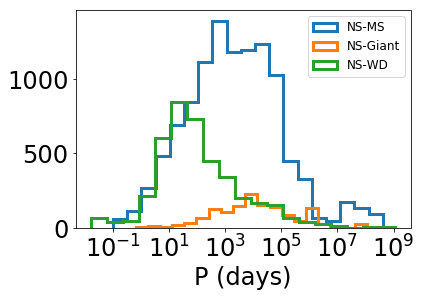

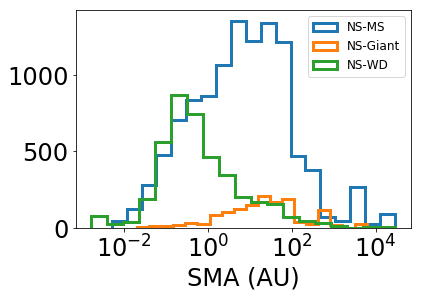

In [5]:
##Plot initial properties of NS binary in binary interaction that leads to DNS and DNS mergers.
SMA, M0, M1=tc.get_NS_binint('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/path_allfinished_newruns_maingrid.dat', 0.5)

labels=['NS-MS', 'NS-Giant', 'NS-WD']
plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(periods, bins=np.logspace(np.log10(min(periods)), np.log10(max(periods)), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('P (days)')
plt.legend(loc='upper right', prop={'size': 12})
plt.locator_params(axis='x', numticks=9)

plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(SMA[i], bins=np.logspace(np.log10(min(SMA[i])), np.log10(max(SMA[i])), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('SMA (AU)')
plt.legend(loc='upper right', prop={'size': 12})
plt.locator_params(axis='x', numticks=7)

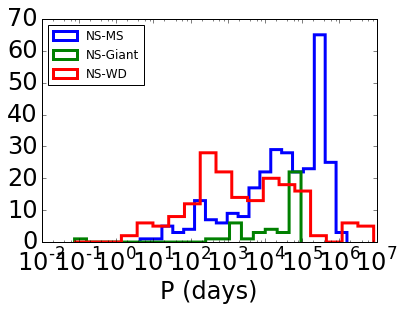

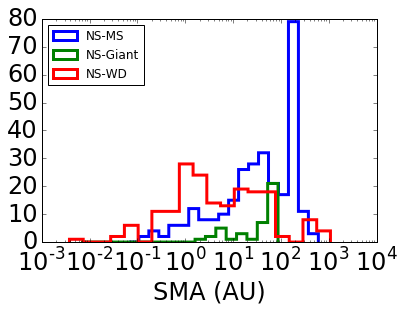

In [19]:
SMA, M0, M1=tc.get_NS_binint('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/path_allfinished_newruns_maingrid.dat', 2)

labels=['NS-MS', 'NS-Giant', 'NS-WD']
plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(periods, bins=np.logspace(np.log10(min(periods)), np.log10(max(periods)), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('P (days)')
plt.legend(loc='upper left', prop={'size': 12})

plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(SMA[i], bins=np.logspace(np.log10(min(SMA[i])), np.log10(max(SMA[i])), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('SMA (AU)')
plt.legend(loc='upper left', prop={'size': 12})

0
10858 265 20
1331 5 1
3975 361 43


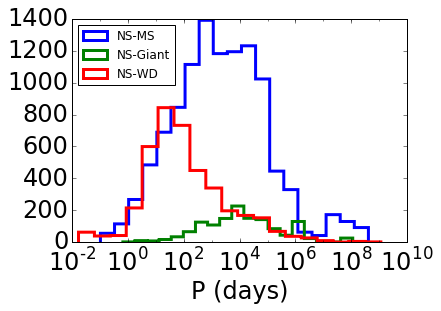

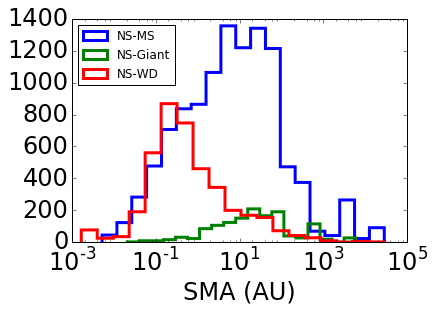

In [4]:
SMA, M0, M1=tc.get_NS_binint('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/path_allfinished_newruns_maingrid.dat', 0.5)

labels=['NS-MS', 'NS-Giant', 'NS-WD']
plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(periods, bins=np.logspace(np.log10(min(periods)), np.log10(max(periods)), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('P (days)')
plt.legend(loc='upper left', prop={'size': 12})
plt.locator_params(axis='x', numticks=9)

plt.figure()
for i in range(4):
    periods=[]
    for j in range(len(SMA[i])):
        periods.append(uc.au_to_period(SMA[i][j], M0[i][j], M1[i][j]))
    if i<3:
        plt.hist(SMA[i], bins=np.logspace(np.log10(min(SMA[i])), np.log10(max(SMA[i])), 20), histtype='step', lw=3., 
                label=labels[i])
        
plt.xscale('log')
plt.xlabel('SMA (AU)')
plt.legend(loc='upper left', prop={'size': 12})
plt.locator_params(axis='x', numticks=7)

9652
[0.9999634662, 0.9999930002, 0.999955566, 0.9999779334]


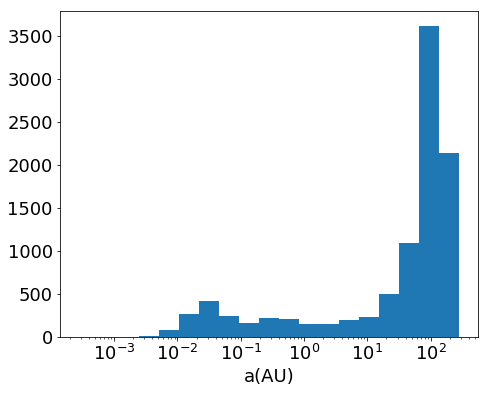

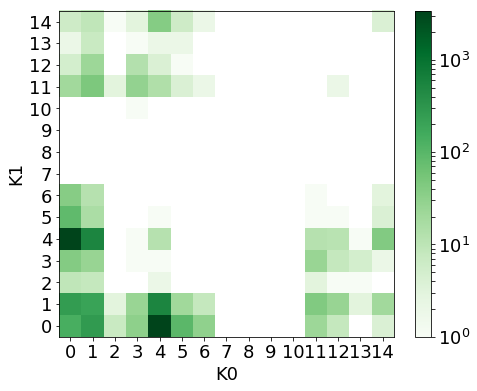

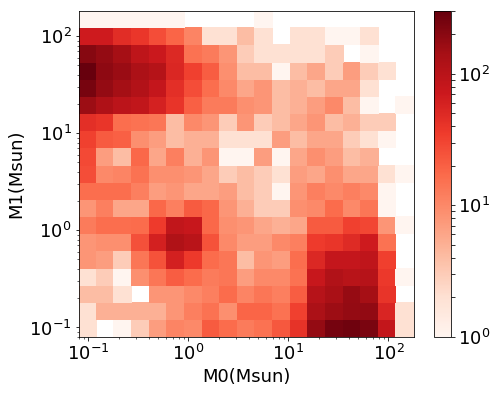

In [63]:
##Types and masses and final properties of ss tidal captures
##All the tidal captures in the tidal capture file
M0, M1, K0, K1, A, E=tc.find_tc_types('/projects/b1095/syr904/cmc/cmc-mpi-tidalcapture/rundir/8e5rv0.5rg8z0.002/')

print(len(M0))

print([x for x in E if x > 0])

matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [7.5,6]

plt.figure()
plt.hist(A, bins=np.logspace(np.log10(min(A)),np.log10(max(A)), 20))
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('a(AU)')


K0=[x - 0.5 for x in K0]
K1=[Y - 0.5 for Y in K1]
plt.figure()
ax=plt.gca()
plt.hist2d(K0, K1, bins=np.arange(16)-0.5, norm=mpl.colors.LogNorm(), cmap='Greens')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.yaxis.set_major_locator(plt.MaxNLocator(15))
plt.xlabel('K0')
plt.ylabel('K1')
plt.colorbar()

xbins=np.logspace(np.log10(min(M0)),np.log10(max(M0)), 20)
ybins=np.logspace(np.log10(min(M1)),np.log10(max(M1)), 20)
counts, _, _ = np.histogram2d(M0, M1, bins=(xbins, ybins))
plt.figure()
plt.pcolormesh(xbins, ybins, counts.T, norm=mpl.colors.LogNorm(), cmap='Reds')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M0(Msun)')
plt.ylabel('M1(Msun)')
plt.colorbar()

Text(0,0.5,'B(G)')

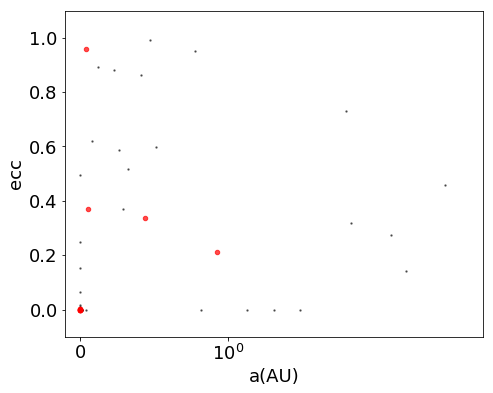

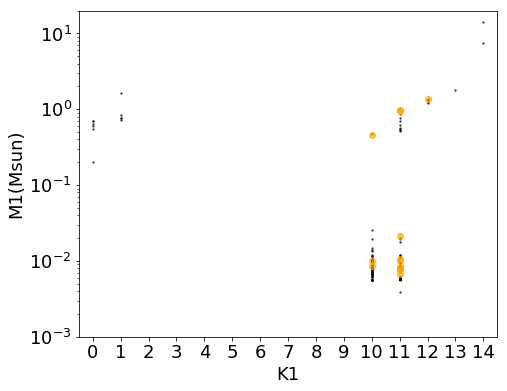

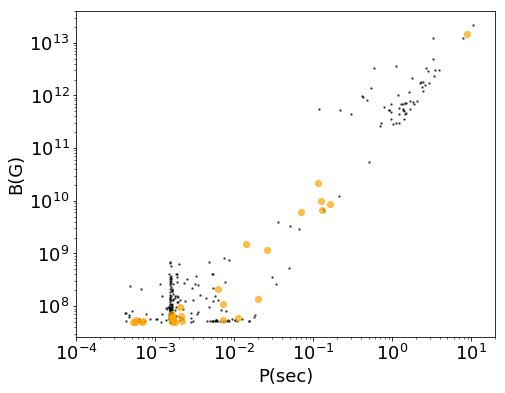

In [80]:
##Pulsar compainon types and masses and pulsar properties from the main grid models compare to the new test model
##with tidal capture implemented

datamsp=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/newruns/finaldata/msp_maingrid_last.dat')
datapsr=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/newruns/finaldata/normalpsr_maingrid_last.dat')

main={'m0': list(datamsp[:,10])+list(datapsr[:,10]), 'm1': list(datamsp[:,11])+list(datapsr[:,11]), 
     'k0': list(datamsp[:,14])+list(datapsr[:,14]), 'k1': list(datamsp[:,15])+list(datapsr[:,15]), 
     'a': list(datamsp[:,16])+list(datapsr[:,16]), 'e': list(datamsp[:,17])+list(datapsr[:,17]), 
     'B': list(datamsp[:,4])+list(datapsr[:,4]), 'P': list(datamsp[:,5])+list(datapsr[:,5])}


datamsp_test=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/tc_comparison/MSP_last.dat')
datapsr_test=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/tc_comparison/PSR_last.dat')
test={'m0': list(datamsp_test[:,10])+list(datapsr_test[:,10]), 'm1': list(datamsp_test[:,11])+list(datapsr_test[:,11]), 
          'k0': list(datamsp_test[:,14])+list(datapsr_test[:,14]), 'k1': list(datamsp_test[:,15])+list(datapsr_test[:,15]), 
          'a': list(datamsp_test[:,16])+list(datapsr_test[:,16]),  'e': list(datamsp_test[:,17])+list(datapsr_test[:,17]), 
          'B': list(datamsp_test[:,4])+list(datapsr_test[:,4]), 'P': list(datamsp_test[:,5])+list(datapsr_test[:,5])}


matplotlib.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [7.5,6]

plt.figure()
plt.scatter(main['a'], main['e'], marker='.', alpha=0.5, color='k', s=8)
plt.scatter(test['a'], test['e'], color='red', alpha=0.7, s=20)
plt.xlim(-0.1, 5)
plt.ylim(-0.1, 1.1)
plt.xscale('symlog')
plt.xlabel('a(AU)')
plt.ylabel('ecc')


plt.figure()
ax=plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(15, integer=True))
plt.scatter(main['k1'], main['m1'], marker='.', color='k', alpha=0.6, s=8)
plt.scatter(test['k1'], test['m1'], color='orange', alpha=0.7)
plt.xlim(-0.5, 14.5)
plt.ylim(ymin=0.001)
plt.xlabel('K1')
plt.ylabel('M1(Msun)')
plt.yscale('log')


plt.figure()
plt.scatter(main['P'], main['B'], alpha=0.6, marker='.', color='k', s=8)
plt.scatter(test['P'], test['B'], alpha=0.7, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0001, 20)
plt.xlabel('P(sec)')
plt.ylabel('B(G)')

89342504.50283


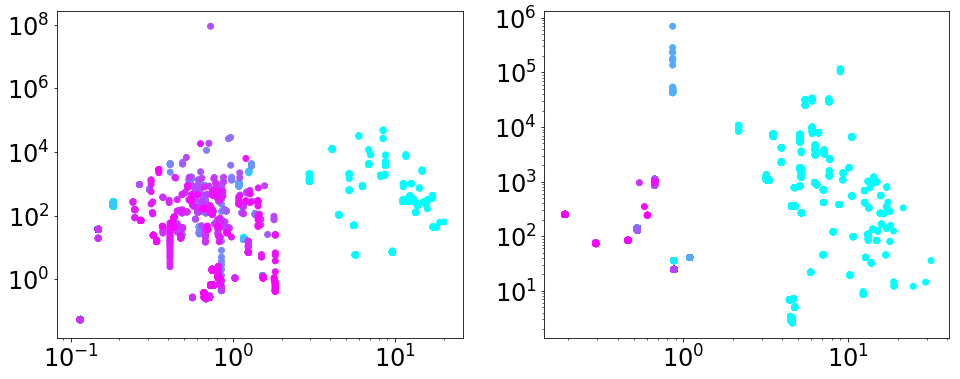

In [25]:
##M-Porb plot for all the NS-MS binaries in the two new models with tidal capture implemented. 
##Include repeating binary system.
data_rvs=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/tc_comparison/8e5rv0.5rg8z0.002/NS_MS_alltimes.dat')
M2_rvs=data_rvs[:,4]; Porb_rvs=data_rvs[:,9]; T_rvs=[i /1000. for i in data_rvs[:,0]]

data_rvl=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR2/tc_comparison/8e5rv1rg8z0.002/NS_MS_alltimes.dat')
M2_rvl=data_rvl[:,4]; Porb_rvl=data_rvl[:,9]; T_rvl=[i /1000. for i in data_rvl[:,0]]

cm = plt.cm.get_cmap('cool')

plt.rcParams['figure.figsize'] = [16,6]
fig, axs=plt.subplots(ncols=2)
for i in range(len(M2_rvs)):
axs[0].scatter(M2_rvs, Porb_rvs, c=T_rvs, cmap=cm)
axs[0].set_xscale('log')
axs[0].set_yscale('log')


sc1=axs[1].scatter(M2_rvl, Porb_rvl, c=T_rvl, cmap=cm)
axs[1].set_xscale('log')
axs[1].set_yscale('log')

#plt.colorbar(sc1)


617.5410444291792
8698.909678014708


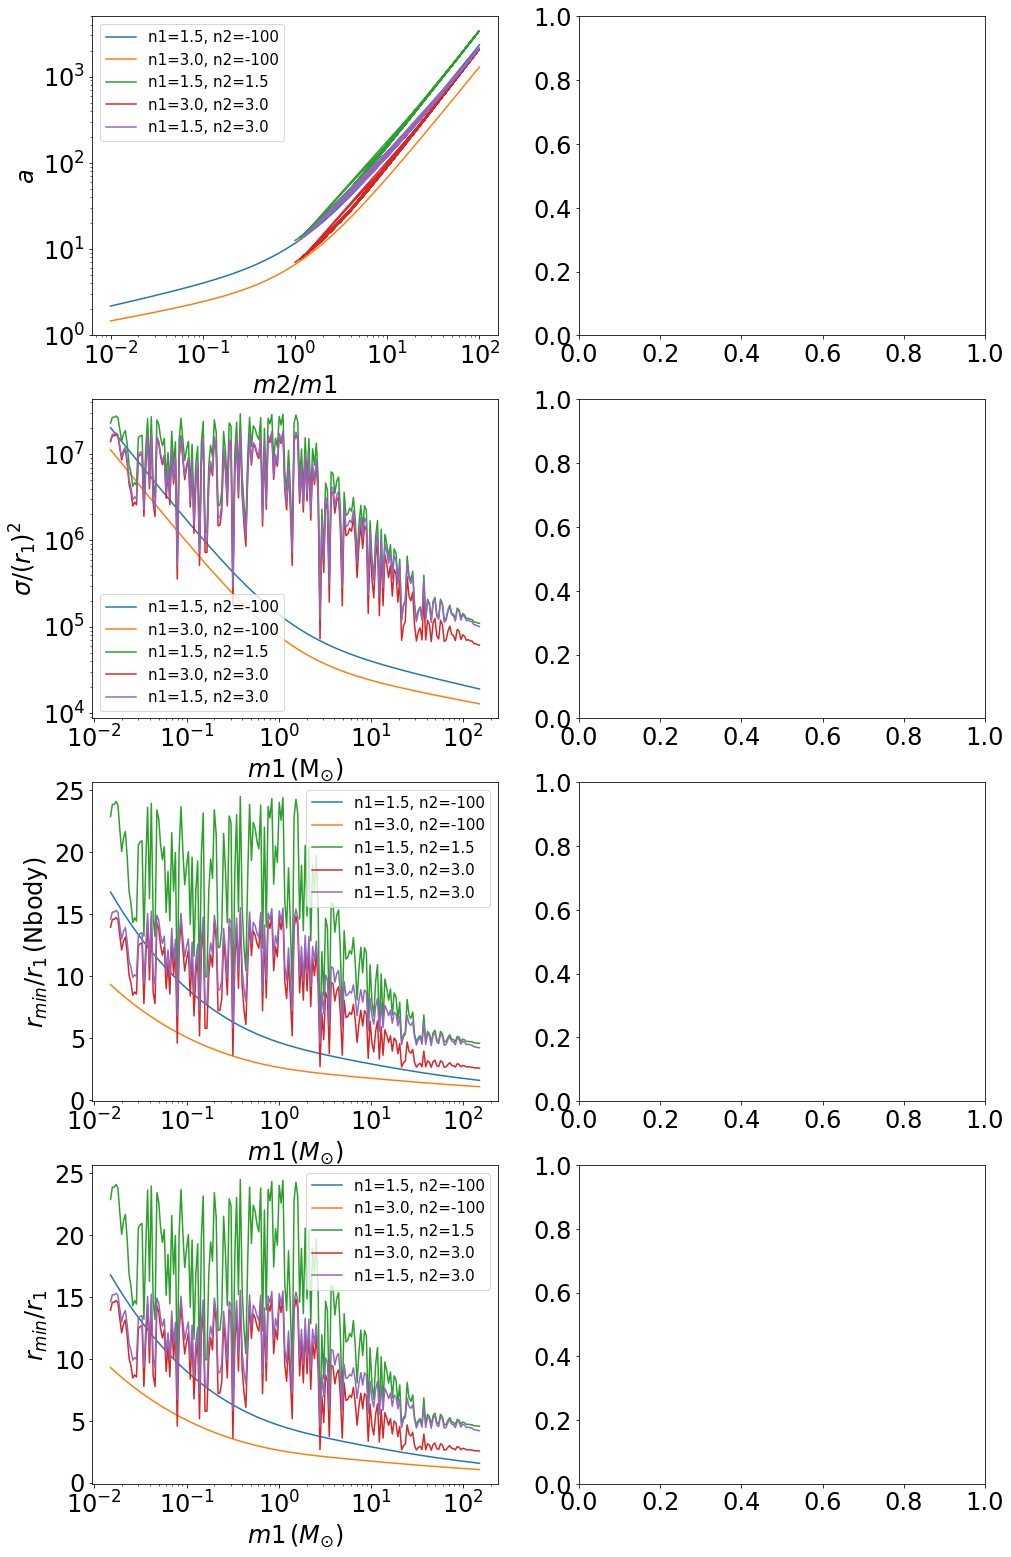

In [28]:
## Kim & Lee 1999 fitting formula plot

def prefix_a(n1, n2, m1, m2): ##m1 is the oscillating star, m2 is the perturber. q = m2/m1
    q = m2/m1
    #print(m1, m2, q)
    if n2==-100: ## compact object + star
        if n1==1.5:
            a = 6.60*q**0.242 + 5.06*q**1.33
        if n1==3.:
            a = 3.66*q**0.2 + 2.94*q**1.32
    else:  ## star + star
        gamma = 0.5; lga=np.log(gamma)
        if n1 == 1.5 and n2 == 1.5:
            a = 6.05*q**(0.835*lga+0.468) + 6.5*q**(0.563*lga+1.75)
        if n1 == 3. and n2 == 3.:
            a = 3.5*q**(0.814*lga+0.551) + 3.53*q**(0.598*lga+1.8)
        if n1 == 1.5 and n2 == 3.:
            a = 7.98*q**(-1.23*lga-0.232) + 3.57*q**(0.625*lga+1.81) 
    return a


n_1=[1.5, 3., 1.5, 3., 1.5]; n_2=[-100, -100, 1.5, 3., 3.]
m_2_nd=1.5
m_1=np.logspace(np.log10(0.015), np.log10(150), 200)  ##in solar mass
#print(m_1)
r_1=m_1  ##in solar radius

m_2_nn = []
for x in range(len(m_1)):
    m_2_nn.append(np.random.uniform(m_1[x], min(100*m_1[x],150)))
    #print(m_2_nn[x]-m_1[x])

v_inf = 10 #km/s
v_star = (2*Gconst_sun*PC_Rsun)**0.5
beta = 2.2
print(v_star)

q_v = (v_inf/v_star)**(-beta)
print(q_v)

plt.rcParams['figure.figsize'] = [16,27]
fig, axs=plt.subplots(ncols=2, nrows=4)

sigma_factor=[[], [], [], [], []]
a_factor = [[], [], [], [], []]
r_nbody_factor = [[], [], [], [], []]
r_dot = [[], [], [], [], []]
r_min_factor = [[], [], [], [], []]
for i in range(len(n_1)):
    if i<2:
        m_2 = np.full_like(m_1, m_2_nd, dtype=np.double)
    else:
        m_2 = m_2_nn

        
    for j in range(len(m_1)):
        a_temp = prefix_a(n_1[i], n_2[i], m_1[j], m_2[j])
        a_factor[i].append(a_temp)
        sigma_factor[i].append(a_temp * q_v)

        r_nbody_factor[i].append(a_temp/np.pi/(1+m_2[j]/m_1[j])*(v_inf/v_star)**(2-beta))
        
        r_dot[i].append(math.sqrt(a_temp * q_v/np.pi)*r_1[j])
        #print(r_dot[i][j])
        
        b = 2*Gconst_sun*(m_1[j]+m_2[j])*PC_Rsun/v_inf**2
        c = -a_temp * q_v/np.pi*r_1[j]**2
        #print(b, c)
        delta = b**2-4*c
        if delta<0: 
            print('no root')
            r_min_factor[i].append(10)
        else:
            r_min_factor[i].append((-b+math.sqrt(delta))/2/r_1[j])
        
        
        
for k in range(5):
    if k<2:
        m_2 = m_2_nd
    else:
        m_2 = m_2_nn
        
    axs[0][0].plot(m_2/m_1, a_factor[k], label='n1='+str(n_1[k])+', n2='+str(n_2[k]))
    #print(m_2/m_1)
    axs[0][0].set_xscale('log')
    axs[0][0].set_yscale('log')
    axs[0][0].set_xlabel(r'$m2/m1$')
    axs[0][0].set_ylabel(r'$a$')
    axs[0][0].legend(loc='best', prop={'size': 15})
    
    axs[1][0].plot(m_1, sigma_factor[k], label='n1='+str(n_1[k])+', n2='+str(n_2[k]))
    axs[1][0].set_xscale('log')
    axs[1][0].set_yscale('log')
    axs[1][0].set_xlabel(r'$m1\,\rm{(M_{\odot})}$') 
    axs[1][0].set_ylabel(r'$\sigma/(r_1)^2$')
    axs[1][0].legend(loc='best', prop={'size': 15})
    
    
    axs[2][0].plot(m_1, r_nbody_factor[k], label='n1='+str(n_1[k])+', n2='+str(n_2[k]))
    axs[2][0].set_xscale('log')
    axs[2][0].set_xlabel(r'$m1\,(M_{\odot})$')
    axs[2][0].set_ylabel(r'$r_{min}/r_1\, \rm{(Nbody)}$')
    axs[2][0].legend(loc='best', prop={'size': 15})
    
    
    axs[3][0].plot(m_1, r_min_factor[k], label='n1='+str(n_1[k])+', n2='+str(n_2[k]))
    axs[3][0].set_xscale('log')
    axs[3][0].set_xlabel(r'$m1\,(M_{\odot})$')
    axs[3][0].set_ylabel(r'$r_{min}/r_1$')
    axs[3][0].legend(loc='best', prop={'size': 15})
    

617.5410444291792
8698.909678014708


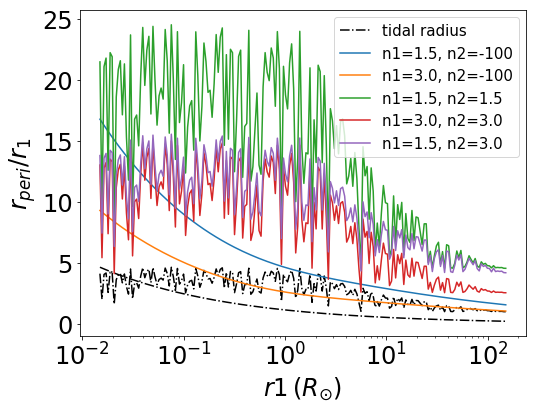

In [2]:
## Kim & Lee 1999 fitting formula plot

def prefix_a(n1, n2, m1, m2): ##m1 is the oscillating star, m2 is the perturber. q = m2/m1
    q = m2/m1
    #print(m1, m2, q)
    if n2==-100: ## compact object + star
        if n1==1.5:
            a = 6.60*q**0.242 + 5.06*q**1.33
        if n1==3.:
            a = 3.66*q**0.2 + 2.94*q**1.32
    else:  ## star + star
        gamma = 0.5; lga=np.log(gamma)
        if n1 == 1.5 and n2 == 1.5:
            a = 6.05*q**(0.835*lga+0.468) + 6.5*q**(0.563*lga+1.75)
        if n1 == 3. and n2 == 3.:
            a = 3.5*q**(0.814*lga+0.551) + 3.53*q**(0.598*lga+1.8)
        if n1 == 1.5 and n2 == 3.:
            a = 7.98*q**(-1.23*lga-0.232) + 3.57*q**(0.625*lga+1.81) 
    return a


n_1=[1.5, 3., 1.5, 3., 1.5]; n_2=[-100, -100, 1.5, 3., 3.]
m_2_nd=1.5
m_1=np.logspace(np.log10(0.015), np.log10(150), 200)  ##in solar mass
#print(m_1)
r_1=m_1  ##in solar radius

m_2_nn = []
for x in range(len(m_1)):
    m_2_nn.append(np.random.uniform(m_1[x], min(100*m_1[x],150)))
    #print(m_2_nn[x]-m_1[x])

v_inf = 10 #km/s
v_star = (2*Gconst_sun*PC_Rsun)**0.5
beta = 2.2
print(v_star)

q_v = (v_inf/v_star)**(-beta)
print(q_v)

plt.rcParams['figure.figsize'] = [8,6]
fig, axs=plt.subplots()

sigma_factor=[[], [], [], [], []]
a_factor = [[], [], [], [], []]
r_nbody_factor = [[], [], [], [], []]
r_not = [[], [], [], [], []]
r_min_factor = [[], [], [], [], []]
r_tidal = [[], [], [], [], []]   ##(m2/m1)^(1/3)
 
for i in range(len(n_1)):
    if i<2:
        m_2 = np.full_like(m_1, m_2_nd, dtype=np.double)
    else:
        m_2 = m_2_nn

        
    for j in range(len(m_1)):
        a_temp = prefix_a(n_1[i], n_2[i], m_1[j], m_2[j])
        a_factor[i].append(a_temp)
        sigma_factor[i].append(a_temp * q_v)

        r_nbody_factor[i].append(a_temp/np.pi/(1+m_2[j]/m_1[j])*(v_inf/v_star)**(2-beta))
        
        r_not[i].append(math.sqrt(a_temp * q_v/np.pi)*r_1[j])
        #print(r_dot[i][j])
        
        b = 2*Gconst_sun*(m_1[j]+m_2[j])*PC_Rsun/v_inf**2
        c = -a_temp * q_v/np.pi*r_1[j]**2
        #print(b, c)
        delta = b**2-4*c
        if delta<0: 
            print('no root')
            r_min_factor[i].append(10)
        else:
            r_min_factor[i].append((-b+math.sqrt(delta))/2/r_1[j])
            
        
    r_tidal[i]= (m_2/m_1)**(1/3)
           
axs.plot(m_1, r_tidal[0], ls='-.', color='k', label='tidal radius') 
axs.plot(m_1, r_tidal[2], ls='-.', color='k')
for k in range(5):
    if k<2:
        m_2 = m_2_nd
    else:
        m_2 = m_2_nn
  

    axs.plot(m_1, r_min_factor[k], label='n1='+str(n_1[k])+', n2='+str(n_2[k]))
    axs.set_xscale('log')
    #axs.set_yscale('log')
    axs.set_xlabel(r'$r1\,(R_{\odot})$')
    axs.set_ylabel(r'$r_{peri}/r_1$')
    axs.legend(loc='best', prop={'size': 15})
    
 

[  1.           1.00927151   1.01862899   1.02807322   1.03760502
   1.04722519   1.05693455   1.06673394   1.07662418   1.08660611
   1.0966806    1.10684849   1.11711065   1.12746796   1.13792129
   1.14847155   1.15911962   1.16986641   1.18071285   1.19165984
   1.20270833   1.21385926   1.22511358   1.23647224   1.24793621
   1.25950646   1.271184     1.2829698    1.29486487   1.30687023
   1.3189869    1.3312159    1.34355829   1.35601511   1.36858742
   1.3812763    1.39408283   1.40700809   1.42005318   1.43321923
   1.44650734   1.45991865   1.47345431   1.48711546   1.50090328
   1.51481892   1.52886359   1.54303847   1.55734477   1.57178372
   1.58635653   1.60106446   1.61590875   1.63089068   1.6460115
   1.66127252   1.67667503   1.69222035   1.7079098    1.72374471
   1.73972643   1.75585633   1.77213578   1.78856616   1.80514888
   1.82188534   1.83877698   1.85582523   1.87303154   1.89039738
   1.90792422   1.92561357   1.94346693   1.96148581   1.97967175
   1.998026

/software/anaconda3.6/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


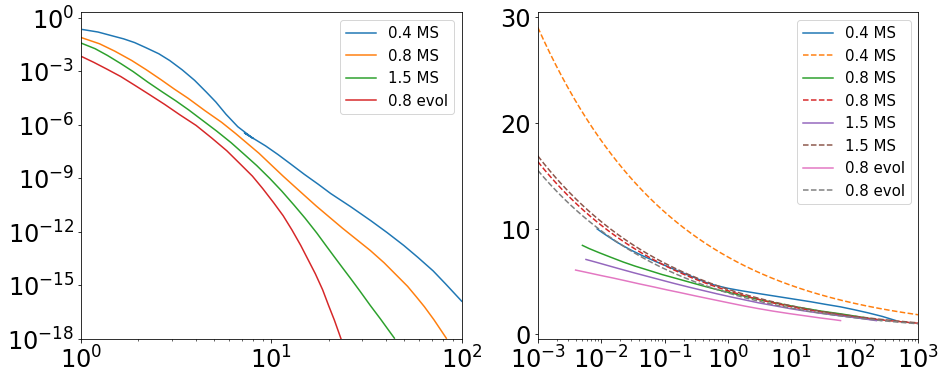

In [5]:
##Compare the Kim & Lee prescription with realistic star models from McMillan, Mcdermott, and Taam 1987

##Data from McMillan et al. 1987
df_erg = pd.read_csv('/projects/b1095/syr904/projects/tidal_capture/E_eta_datasets.csv')
data_erg = df_erg.iloc[1:]

df_rcrit = pd.read_csv('/projects/b1095/syr904/projects/tidal_capture/Rcrit_vinf_datasets.csv')
data_rcrit = df_rcrit.iloc[1:]

E_df = [[],[],[],[]]; Eta_df = [[],[],[],[]]; Rcrit_df = [[],[],[],[]]; Vinf_df = [[],[],[],[]]
for i in range(4):
    Eta_df[i] = [float(x) for x in data_erg.iloc[:,2*i].tolist()]
    E_df[i] = [float(x) for x in data_erg.iloc[:,2*i+1].tolist()]
    
    Vinf_df[i] = [float(x) for x in data_rcrit.iloc[:,2*i].tolist()]
    Rcrit_df[i] = [float(x) for x in data_rcrit.iloc[:,2*i+1].tolist()]
    
    

##Data from the fitting formulae
def prefix_a(n1, n2, m1, m2, r1, r2): ##m1 is the oscillating star, m2 is the perturber. q = m2/m1
    q = m2/m1
    #print(m1, m2, q)
    if n2==-100: ## compact object + star
        if n1==1.5:
            a = 6.60*q**0.242 + 5.06*q**1.33
        if n1==3.:
            a = 3.66*q**0.2 + 2.94*q**1.32
    else:  ## star + star
        #gamma = np.log(r2/r1)/np.log(m2/m1)
        gamma = 0.5
        lga=np.log(gamma)
        if n1 == 1.5 and n2 == 1.5:
            a = 6.05*q**(0.835*lga+0.468) + 6.5*q**(0.563*lga+1.75)
        if n1 == 3. and n2 == 3.:
            a = 3.5*q**(0.814*lga+0.551) + 3.53*q**(0.598*lga+1.8)
        if n1 == 1.5 and n2 == 3.:
            a = 7.98*q**(-1.23*lga-0.232) + 3.57*q**(0.625*lga+1.81) 
    
    return a

def Tl(order, polytropicindex, eta):
    l=order; n=polytropicindex; x=np.log10(eta); x2=x*x; x3=x*x2; x4=x2*x2; x5=x2*x3

    if l != 2 and l != 3:
        print("unknown order")
    
    ##From Portegies Zwart & Meinen 1993
    if n == 1.5:
        if l == 2: 
            return pow(10.0, -0.397 + 1.678*x + 1.277*x2 - 12.42*x3 + 9.446*x4 - 5.550*x5)
        else:
            return pow(10.0, -0.909 + 1.574*x + 12.37*x2 - 57.40*x3 + 80.10*x4 - 46.43*x5)
                
    elif n == 2.0:
        if l == 2:
            return pow(10.0, -0.517 - 0.906*x + 23.88*x2 - 93.49*x3 + 112.3*x4 - 44.15*x5)
        else:
            return pow(10.0, -1.040 - 1.354*x + 37.64*x2 - 139.9*x3 + 168.2*x4 - 66.53*x5)
                
    elif n == 3.0:
        if l == 2:
            return pow(10.0, -1.124 + 0.877*x - 13.37*x2 + 21.55*x3 - 16.48*x4 + 4.124*x5)
        else:
            return pow(10.0, -1.703 + 2.653*x - 14.34*x2 + 12.85*x3 - 0.492*x4 - 3.600*x5)
                
    else:
        printf("unknown polytropic index")
             
        

def E_oscillate(eta, Mosc, Rosc, nosc, Mpert):
    #eta=math.sqrt(Mosc/(Mosc+Mpert))*pow(rperi/Rosc, 1.5)
    rperi = Rosc*pow((Mosc+Mpert)/Mosc,1/3)*pow(eta, 2/3)

    #change the unit
    return math.sqr(Mpert)/Rosc * (pow(Rosc/rperi, 6.0) * Tl(2, nosc, eta) + pow(Rosc/rperi, 8.0) * Tl(3, nosc, eta))



n_1 = [1.5, 3., 3., 3.]; n_2 = [1.5, 3., 3., 3.]
m_1 = [0.4, 0.8, 1.5, 0.8]; m_2 = [0.4, 0.8, 1.5, 0.8]
r_1 = [0.359, 0.691, 0.934, 1.161]; r_2 = [0.359, 0.691, 0.934, 1.161]

##Calculate critical periastron distance
v_inf = np.logspace(np.log10(0.001), np.log10(1000), 500)
v_star = []; a_temp = []
for k in range(4):
    v_star.append((2*Gconst_sun*PC_Rsun*m_1[k]/r_1[k])**0.5)
    a_temp.append(prefix_a(n_1[k], n_2[k], m_1[k], m_2[k], r_1[k], r_2[k]))

beta=2.2
r_nbody_factor = [[],[],[],[]]
for i in range(4):
    for k in range(len(v_inf)):
        q_v = (v_inf[k]/v_star[i])**(-beta)
        r_nbody_factor[i].append(a_temp[i]/np.pi/(1+m_2[i]/m_1[i])*(v_inf[k]/v_star[i])**(2-beta))
        

##Calculate the oscillation energy
Eta = np.logspace(np.log10(1), np.log10(100), 500)
E_osc = [[],[],[],[]]
for i in range(4):
    for k in range(len(Eta)):
        E_osc[i].append(E_oscillate(rperi, m_1[i], r_1[i], n_1[i], m_2[i]))
    

##Plotting
lbs = ['0.4 MS', '0.8 MS', '1.5 MS', '0.8 evol']    
fig, axs = plt.subplots(ncols = 2, figsize=(15, 6))
for j in range(4):
    axs[0].plot(Eta_df[j], E_df[j], label=lbs[j])
    axs[1].plot(Vinf_df[j], Rcrit_df[j], label=lbs[j])
    axs[1].plot(v_inf, r_nbody_factor[j], ls='--', label=lbs[j])

axs[0].set_xlim(1, 100)
axs[0].set_ylim(1e-18, 2)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend(loc='best', fontsize=15)

axs[1].set_xlim(0.001, 1000)
#axs[1].set_ylim(1, 10)
axs[1].set_xscale('log')
axs[1].legend(loc='best', fontsize=15)




In [4]:
def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    #print(len(m), len(x))
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    else:
        print('len(m) not equal to len(x)')
        
    return sc

614 0
SS_COLL_TC_G 501357 17043 4 0 93.7 0.12 -0.05912 0.0 3790.0 7220.0 0.138
SS_COLL_TC_G 129813 472472 0 4 0.119 77.4 -0.04776 0.0 10300.0 0.137 8110.0
SS_COLL_TC_G 599094 469111 0 4 0.19 75.8 -0.08121 0.0 7390.0 0.211 8210.0
SS_COLL_TC_G 145504 81568 0 4 0.101 68.6 -0.006458 0.0 8470.0 0.141 8620.0
SS_COLL_TC_G 428764 595882 4 0 67.8 0.277 -0.06596 0.0 7210.0 8600.0 0.279
SS_COLL_TC_G 39218 339805 0 4 0.167 68.8 -0.01723 0.0 8490.0 0.189 8620.0
SS_COLL_TC_G 194919 103838 4 0 79.5 0.337 -0.7635 0.0 4810.0 7960.0 0.321
SS_COLL_TC_G 174729 238771 0 4 0.427 65.5 -0.1153 0.0 8170.0 0.386 8820.0
SS_COLL_TC_G 361148 383600 0 4 0.117 62.8 -0.02622 0.0 10400.0 0.135 8950.0
SS_COLL_TC_G 419462 38173 0 4 0.0888 83.8 -0.00849 0.0 7560.0 0.148 6920.0
SS_COLL_TC_G 347240 386860 4 0 70.2 0.328 -0.08238 0.0 6010.0 8540.0 0.315
SS_COLL_TC_G 440331 661844 4 0 65.7 0.317 -0.3968 0.0 6230.0 8790.0 0.307
SS_COLL_TC_G 487617 394917 0 4 0.294 58.2 -0.5228 0.0 11500.0 0.291 9040.0
SS_COLL_TC_G 235202 1392

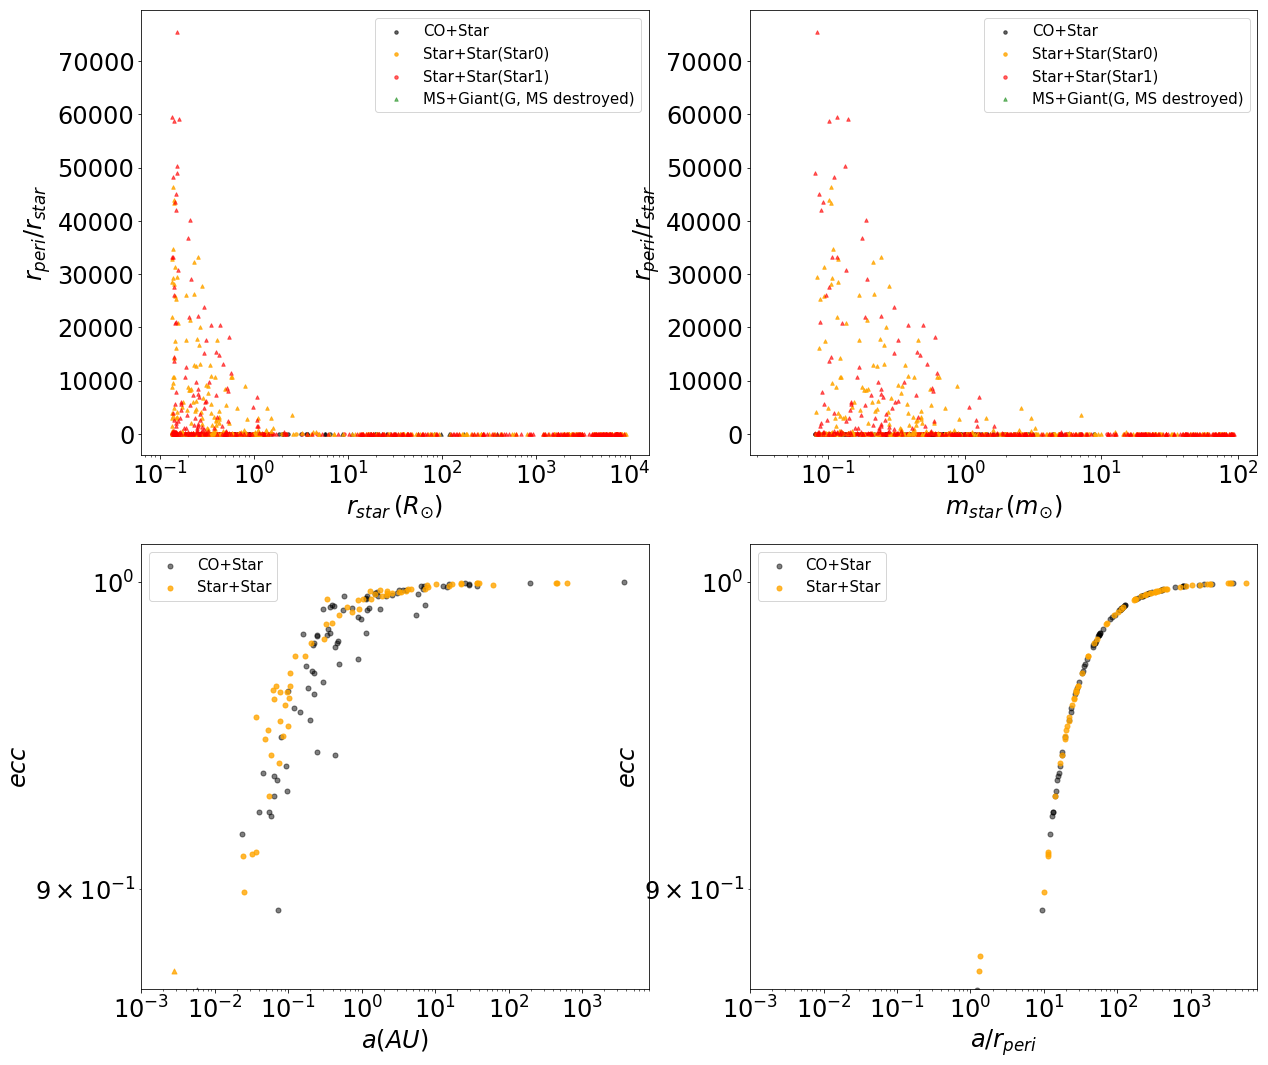

In [6]:
##The following is data from 
##/projects/b1095/syr904/cmc/cmc-mpi-tidalcapture/rundir_test5/8e5rv1rg8z0.002_tc_poly
prop_init, prop_finl, prop_des = tc.find_tc_properties('/projects/b1095/syr904/cmc/cmc-mpi-tidalcapture/rundir_test9/8e5rv1rg8z0.002_tc_poly/')
print(len(prop_init['id0']), len(prop_des['id0']))

r_peri_co=[]; r_star_co=[]; m_star_co=[]; sma_co=[]; ecc_co=[]
G_r_peri_co=[]; G_r_star_co=[]; G_m_star_co=[]; G_sma_co=[]; G_ecc_co=[]

r_peri=[]; r_star0=[]; r_star1=[]; m_star0=[]; m_star1=[]; sma=[]; ecc=[]
G_r_peri=[]; G_r_star0=[]; G_r_star1=[]; G_m_star0=[]; G_m_star1=[]; G_sma=[]; G_ecc=[]

n_wrong=0
for h in range(len(prop_init['id0'])):
    if 10<=prop_init['k0'][h]<=14:
        dist_ratio = prop_finl['sma'][h]*AU_Rsun/prop_finl['r1'][h]
        if dist_ratio<=0:
            print(prop_init['type'][h],prop_init['id0'][h],prop_init['id1'][h],
                  prop_init['k0'][h],prop_init['k1'][h],prop_init['m0'][h],
                  prop_init['m1'][h],prop_finl['sma'][h],prop_finl['ecc'][h],
                  prop_init['rperi'][h],prop_init['r0'][h], prop_init['r1'][h])
            n_wrong+=1
            
        else:
            if 2<=prop_init['k1'][h]<=9 and prop_init['k1'][h]!=7:
                G_sma_co.append(prop_finl['sma'][h]); G_ecc_co.append(prop_finl['ecc'][h])
                G_r_peri_co.append(prop_init['rperi'][h])
                G_r_star_co.append(prop_init['r1'][h]); G_m_star_co.append(prop_init['m1'][h])
            else:
                sma_co.append(prop_finl['sma'][h]); ecc_co.append(prop_finl['ecc'][h])
                r_peri_co.append(prop_init['rperi'][h])
                r_star_co.append(prop_init['r1'][h]); m_star_co.append(prop_init['m1'][h])
            
    elif 10<=prop_init['k1'][h]<=14:
        dist_ratio = prop_finl['sma'][h]*AU_Rsun/prop_finl['r0'][h]
        if dist_ratio<=0:
            print(prop_init['type'][h],prop_init['id0'][h],prop_init['id1'][h],
                  prop_init['k0'][h],prop_init['k1'][h],prop_init['m0'][h],
                  prop_init['m1'][h],prop_finl['sma'][h],prop_finl['ecc'][h],
                  prop_init['rperi'][h],prop_init['r0'][h], prop_init['r1'][h])
            n_wrong+=1
            
        else:
            if 2<=prop_init['k0'][h]<=9 and prop_init['k0'][h]!=7:
                G_sma_co.append(prop_finl['sma'][h]); G_ecc_co.append(prop_finl['ecc'][h])
                G_r_peri_co.append(prop_init['rperi'][h])
                G_r_star_co.append(prop_init['r0'][h]); G_m_star_co.append(prop_init['m0'][h])
            else:
                sma_co.append(prop_finl['sma'][h]); ecc_co.append(prop_finl['ecc'][h])
                r_peri_co.append(prop_init['rperi'][h])
                r_star_co.append(prop_init['r0'][h]); m_star_co.append(prop_init['m0'][h])
        
    else:   
        dist_ratio0 = prop_finl['sma'][h]*AU_Rsun/prop_finl['r0'][h] 
        dist_ratio1 = prop_finl['sma'][h]*AU_Rsun/prop_finl['r1'][h]
        if prop_finl['sma'][h]<=0:
            print(prop_init['type'][h],prop_init['id0'][h],prop_init['id1'][h],
                  prop_init['k0'][h],prop_init['k1'][h],prop_init['m0'][h],
                  prop_init['m1'][h],prop_finl['sma'][h],prop_finl['ecc'][h],
                  prop_init['rperi'][h],prop_init['r0'][h], prop_init['r1'][h])
            n_wrong+=1
            
        else:
            if (2<=prop_init['k0'][h]<=9 and prop_init['k0'][h]!=7) or (2<=prop_init['k1'][h]<=9 and prop_init['k1'][h]!=7):
                G_sma.append(prop_finl['sma'][h]); G_ecc.append(prop_finl['ecc'][h])
                G_r_peri.append(prop_init['rperi'][h])
                G_r_star0.append(prop_init['r0'][h]); G_m_star0.append(prop_init['m0'][h])
                G_r_star1.append(prop_init['r1'][h]); G_m_star1.append(prop_init['m1'][h])
            else:
                sma.append(prop_finl['sma'][h]); ecc.append(prop_finl['ecc'][h])
                r_peri.append(prop_init['rperi'][h])
                r_star0.append(prop_init['r0'][h]); m_star0.append(prop_init['m0'][h])
                r_star1.append(prop_init['r1'][h]); m_star1.append(prop_init['m1'][h])
        
#print(min(sma_co), max(sma_co), min(sma), max(sma))


r_peri_des=[]; r_star0_des=[]; r_star1_des=[]; m_star0_des=[]; m_star1_des=[]
for g in range(len(prop_des['id0'])):
    if 0<=prop_des['k0'][g]<=1:
        r_peri_des.append(prop_des['rperi'][g])
        r_star0_des.append(prop_des['r0'][g]); r_star1_des.append(prop_des['r1'][g])
        m_star0_des.append(prop_des['m0'][g]); m_star1_des.append(prop_des['m1'][g])
    elif 0<=prop_des['k1'][g]<=1:
        r_peri_des.append(prop_des['rperi'][g])
        r_star0_des.append(prop_des['r1'][g]); r_star1_des.append(prop_des['r0'][g])
        m_star0_des.append(prop_des['m1'][g]); m_star1_des.append(prop_des['m0'][g])

print(len(r_peri_des), len(G_r_peri_co), len(G_r_peri))
print(len(r_peri_co), len(r_peri))
print(n_wrong)
print(max(sma_co))
    
plt.rcParams['figure.figsize'] = [20,18]
fig, axs=plt.subplots(ncols=2, nrows=2)
#ms_co=list(map(lambda x: 'o' if x == 0 else '^', giant_flag_co))
#ms=list(map(lambda x: 'o' if x == 0 else '^', giant_flag))
#print(len(ms_co), len(sma_co), len(ms), len(sma))

##For MS stars
axs[0][0].scatter(r_star_co, np.array(r_peri_co)/np.array(r_star_co),
                     color='k', marker='o', s=12, alpha=0.6, label='CO+Star')
axs[0][0].scatter(r_star0, np.array(r_peri)/np.array(r_star0),
                     color='orange', marker='o', s=12, alpha=0.8, label='Star+Star(Star0)')
axs[0][0].scatter(r_star1, np.array(r_peri)/np.array(r_star1),
                     color='red', marker='o', s=12, alpha=0.6, label='Star+Star(Star1)')

##For giants
axs[0][0].scatter(G_r_star_co, np.array(G_r_peri_co)/np.array(G_r_star_co),
                     color='k', marker='^', s=12, alpha=0.6)
axs[0][0].scatter(G_r_star0, np.array(G_r_peri)/np.array(G_r_star0),
                     color='orange', marker='^', s=12, alpha=0.8)
axs[0][0].scatter(G_r_star1, np.array(G_r_peri)/np.array(G_r_star1),
                     color='red', marker='^', s=12, alpha=0.6)
axs[0][0].scatter(r_star1_des, np.array(r_peri_des)/np.array(r_star1_des), color='green', 
                  marker='^', s=12, alpha=0.5, label='MS+Giant(G, MS destroyed)')
                  

axs[0][0].set_xlabel(r'$r_{star}\,(R_{\odot})$')
axs[0][0].set_ylabel(r'$r_{peri}/r_{star}$')
axs[0][0].set_xscale('log')
axs[0][0].set_yscale('log')
#axs[0][0].set_ylim(0.01, 20)
axs[0][0].legend(loc='best', prop={'size': 15})


##For MS stars
axs[0][1].scatter(m_star_co, np.array(r_peri_co)/np.array(r_star_co),
                     color='k', marker='o', s=12, alpha=0.6, label='CO+Star')
axs[0][1].scatter(m_star0, np.array(r_peri)/np.array(r_star0),
                     color='orange', marker='o', s=12, alpha=0.8, label='Star+Star(Star0)')
axs[0][1].scatter(m_star1, np.array(r_peri)/np.array(r_star1),
                     color='red', marker='o', s=12, alpha=0.6, label='Star+Star(Star1)')

##For giants
axs[0][1].scatter(G_m_star_co, np.array(G_r_peri_co)/np.array(G_r_star_co),
                     color='k', marker='^', s=12, alpha=0.6)
axs[0][1].scatter(G_m_star0, np.array(G_r_peri)/np.array(G_r_star0),
                     color='orange', marker='^', s=12, alpha=0.8)
axs[0][1].scatter(G_m_star1, np.array(G_r_peri)/np.array(G_r_star1),
                     color='red', marker='^', s=12, alpha=0.6)
axs[0][1].scatter(m_star1_des, np.array(r_peri_des)/np.array(r_star1_des), color='green', 
                  marker='^', s=12, alpha=0.5, label='MS+Giant(G, MS destroyed)')
                  
axs[0][1].set_xlabel(r'$m_{star}\,(m_{\odot})$')
axs[0][1].set_ylabel(r'$r_{peri}/r_{star}$')
axs[0][1].set_xscale('log')
axs[0][1].set_yscale('log')
#axs[0][1].set_ylim(0.01, 20)
axs[0][1].legend(loc='best', prop={'size': 15})

                  
##For MS stars
axs[1][0].scatter(sma_co, ecc_co, color='k', marker='o', s=25, alpha=0.5, label='CO+Star')
axs[1][0].scatter(sma, ecc, color='orange', marker='o', s=25, alpha=0.8, label='Star+Star')
              
##For giants
axs[1][0].scatter(G_sma_co, G_ecc_co, color='k', marker='^', s=25, alpha=0.5)
axs[1][0].scatter(G_sma, G_ecc, color='orange', marker='^', s=25, alpha=0.8)                  

axs[1][0].set_xlabel(r'$a(AU)$')
axs[1][0].set_ylabel(r'$ecc$')
axs[1][0].set_xscale('log')
axs[1][0].set_xlim(0.001, 8000)
axs[1][0].set_yscale('log')
axs[1][0].legend(loc='best', prop={'size': 15})

                  
##For MS stars
axs[1][1].scatter(np.array(sma_co)*AU_Rsun/np.array(r_peri_co), ecc_co, 
                     color='k', marker='o', s=25, alpha=0.5, label='CO+Star')
axs[1][1].scatter(np.array(sma)*AU_Rsun/np.array(r_peri), ecc,
                     color='orange', marker='o', s=25, alpha=0.8, label='Star+Star')
                  
##For giants
axs[1][1].scatter(np.array(G_sma_co)*AU_Rsun/np.array(G_r_peri_co), G_ecc_co, 
                     color='k', marker='o', s=25, alpha=0.5)
axs[1][1].scatter(np.array(G_sma)*AU_Rsun/np.array(G_r_peri), G_ecc,
                     color='orange', marker='o', s=25, alpha=0.8)

axs[1][1].set_xlabel(r'$a/r_{peri}$')
axs[1][1].set_ylabel(r'$ecc$')
axs[1][1].set_xscale('log')
axs[1][1].set_xlim(0.001, 8000)
axs[1][1].set_yscale('log')
axs[1][1].legend(loc='best', prop={'size': 15})



    

614 0
SS_COLL_TC_G 501357 17043 4 0 93.7 0.12 -0.05912 0.0 3790.0 7220.0 0.138
SS_COLL_TC_G 129813 472472 0 4 0.119 77.4 -0.04776 0.0 10300.0 0.137 8110.0
SS_COLL_TC_G 599094 469111 0 4 0.19 75.8 -0.08121 0.0 7390.0 0.211 8210.0
SS_COLL_TC_G 145504 81568 0 4 0.101 68.6 -0.006458 0.0 8470.0 0.141 8620.0
SS_COLL_TC_G 428764 595882 4 0 67.8 0.277 -0.06596 0.0 7210.0 8600.0 0.279
SS_COLL_TC_G 39218 339805 0 4 0.167 68.8 -0.01723 0.0 8490.0 0.189 8620.0
SS_COLL_TC_G 194919 103838 4 0 79.5 0.337 -0.7635 0.0 4810.0 7960.0 0.321
SS_COLL_TC_G 174729 238771 0 4 0.427 65.5 -0.1153 0.0 8170.0 0.386 8820.0
SS_COLL_TC_G 361148 383600 0 4 0.117 62.8 -0.02622 0.0 10400.0 0.135 8950.0
SS_COLL_TC_G 419462 38173 0 4 0.0888 83.8 -0.00849 0.0 7560.0 0.148 6920.0
SS_COLL_TC_G 347240 386860 4 0 70.2 0.328 -0.08238 0.0 6010.0 8540.0 0.315
SS_COLL_TC_G 440331 661844 4 0 65.7 0.317 -0.3968 0.0 6230.0 8790.0 0.307
SS_COLL_TC_G 487617 394917 0 4 0.294 58.2 -0.5228 0.0 11500.0 0.291 9040.0
SS_COLL_TC_G 235202 1392

/software/anaconda3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


 244858 246851 4 0 60.4 0.124 -0.02071 0.0 7090.0 5570.0 0.143
SS_COLL_TC_G 105190 610408 0 4 0.641 49.2 -1.066 0.0 6970.0 0.584 6970.0
SS_COLL_TC_G 144320 704592 0 4 0.125 42.9 -0.03931 0.0 4460.0 0.144 7270.0
SS_COLL_TC_G 86081 564603 4 0 61.4 0.508 -0.9722 0.0 5290.0 5140.0 0.453
SS_COLL_TC_G 421378 86577 4 1 37.7 3.0 -17.91 0.0 2280.0 7080.0 1.51
SS_COLL_TC_G 196222 604632 0 4 0.504 36.7 -0.07736 0.0 6380.0 0.45 6890.0
SS_COLL_TC_G 795750 104212 0 4 0.225 56.8 -0.03467 0.0 1970.0 0.24 4790.0
SS_COLL_TC_G 471797 381152 0 4 0.208 41.0 -0.07584 0.0 5050.0 0.226 5860.0
SS_COLL_TC_G 192310 33266 1 4 13.2 27.5 -2.294 0.0 4700.0 4.05 5640.0
SS_COLL_TC_G 176294 158679 0 4 0.0863 33.2 -0.01908 0.0 2360.0 0.149 6390.0
SS_COLL_TC_G 108616 277570 4 1 49.9 4.03 -3.024 0.0 2950.0 4650.0 1.8
SS_COLL_TC_G 469801 421348 4 1 34.2 2.21 -0.4274 0.0 6600.0 5240.0 1.26
SS_COLL_TC_G 542000 392662 4 0 28.1 0.243 -0.08316 0.0 2680.0 5400.0 0.254
SS_COLL_TC_G 470684 120090 4 1 41.1 3.02 -0.4465 0.0 4700.0 4

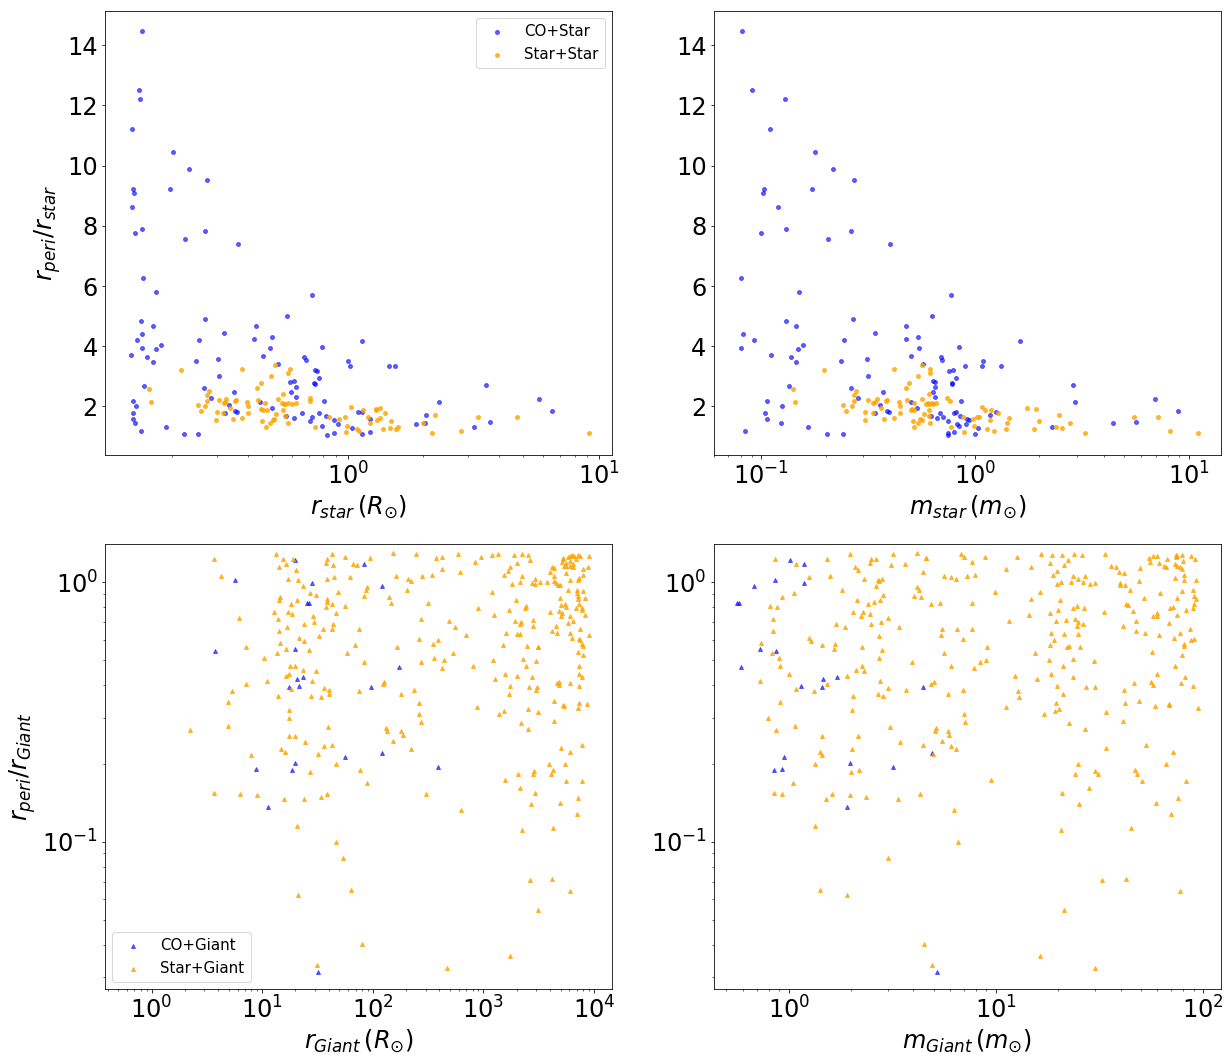

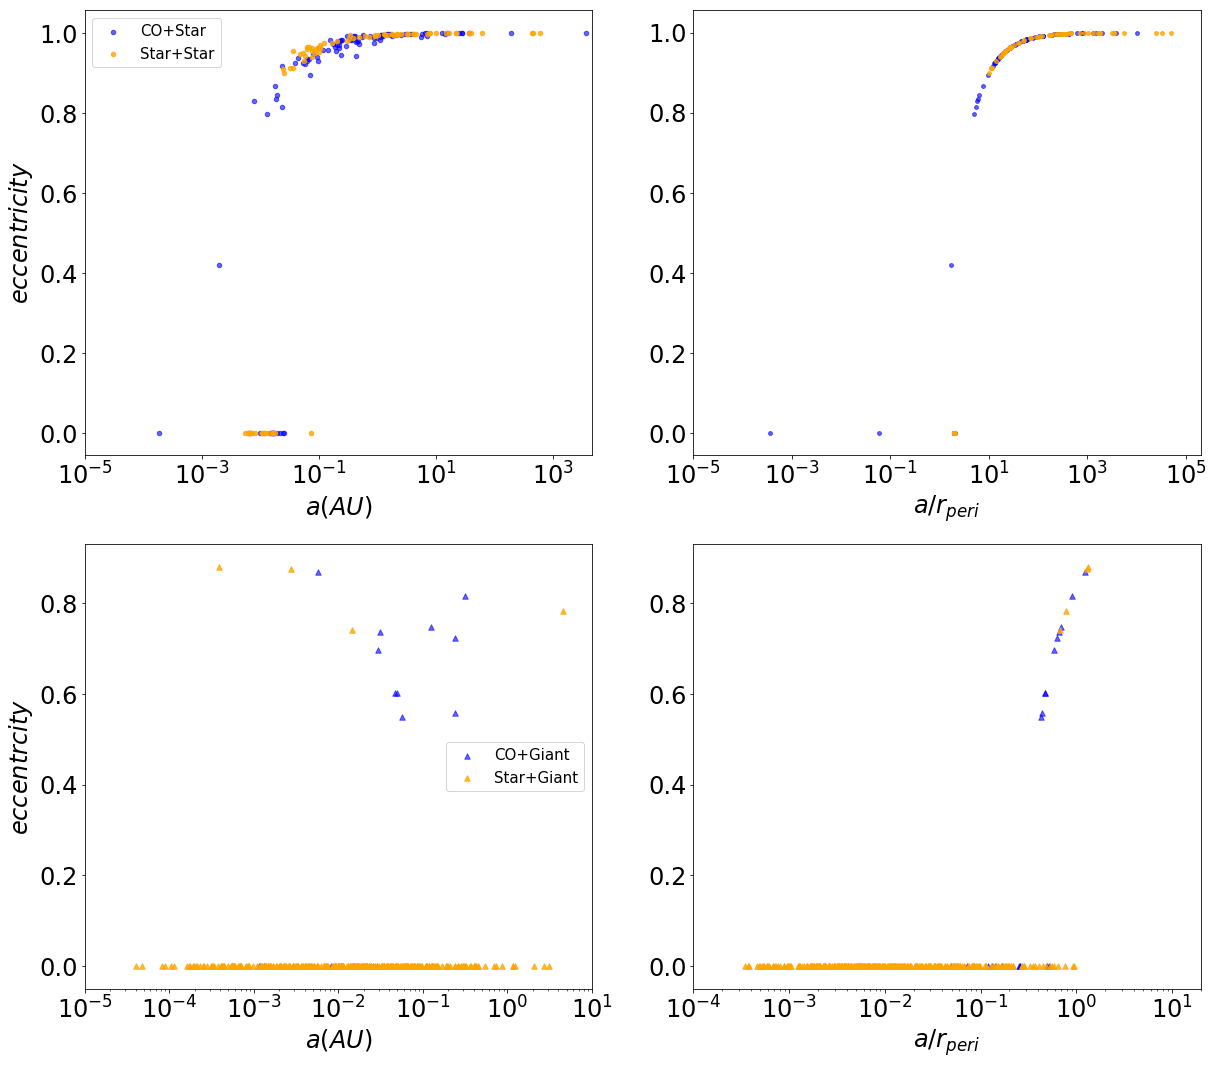

In [11]:
##Plotting initial rperi and final sma and ecc for 
##both giant collision and other star tidal capture
prop_init, prop_finl, prop_des = tc.find_tc_properties('/projects/b1095/syr904/cmc/cmc-mpi-tidalcapture/rundir_test9/8e5rv1rg8z0.002_tc_poly/')
print(len(prop_init['id0']), len(prop_des['id0']))

##CO+STAR
r_peri_co=[]; r_star_co=[]; m_star_co=[]; sma_co=[]; ecc_co=[]
##STAR+STAR
r_peri=[]; r_star0=[]; r_star1=[]; m_star0=[]; m_star1=[]; sma=[]; ecc=[]


##CO+GIANT
G_r_peri_co=[]; G_r_star_co=[]; G_m_star_co=[]; G_sma_co=[]; G_ecc_co=[]
##GIANT+GIANT
G_r_peri=[]; G_r_star0=[]; G_r_star1=[]; G_m_star0=[]; G_m_star1=[]; G_sma=[]; G_ecc=[]


##SAME AS ABOVE BUT FOR FINAL SMA < 0
W_r_peri_co=[]; W_r_star_co=[]; W_m_star_co=[]; W_sma_co=[]; W_ecc_co=[]
W_r_peri=[]; W_r_star0=[]; W_r_star1=[]; W_m_star0=[]; W_m_star1=[]; W_sma=[]; W_ecc=[]


n_wrong=0
for h in range(len(prop_init['id0'])):
    if 10<=prop_init['k0'][h]<=14:
        dist_ratio = prop_finl['sma'][h]*AU_Rsun/prop_finl['r1'][h]
        if dist_ratio<=0:
            print(prop_init['type'][h],prop_init['id0'][h],prop_init['id1'][h],
                  prop_init['k0'][h],prop_init['k1'][h],prop_init['m0'][h],
                  prop_init['m1'][h],prop_finl['sma'][h],prop_finl['ecc'][h],
                  prop_init['rperi'][h],prop_init['r0'][h], prop_init['r1'][h])
            W_sma_co.append(prop_finl['sma'][h]); W_ecc_co.append(prop_finl['ecc'][h])
            W_r_peri_co.append(prop_init['rperi'][h])
            W_r_star_co.append(prop_init['r1'][h]); W_m_star_co.append(prop_init['m1'][h])
            
            n_wrong+=1
            
        else:
            if 2<=prop_init['k1'][h]<=9 and prop_init['k1'][h]!=7:
                G_sma_co.append(prop_finl['sma'][h]); G_ecc_co.append(prop_finl['ecc'][h])
                G_r_peri_co.append(prop_init['rperi'][h])
                G_r_star_co.append(prop_init['r1'][h]); G_m_star_co.append(prop_init['m1'][h])
            else:
                sma_co.append(prop_finl['sma'][h]); ecc_co.append(prop_finl['ecc'][h])
                r_peri_co.append(prop_init['rperi'][h])
                r_star_co.append(prop_init['r1'][h]); m_star_co.append(prop_init['m1'][h])
            
    elif 10<=prop_init['k1'][h]<=14:
        dist_ratio = prop_finl['sma'][h]*AU_Rsun/prop_finl['r0'][h]
        if dist_ratio<=0:
            print(prop_init['type'][h],prop_init['id0'][h],prop_init['id1'][h],
                  prop_init['k0'][h],prop_init['k1'][h],prop_init['m0'][h],
                  prop_init['m1'][h],prop_finl['sma'][h],prop_finl['ecc'][h],
                  prop_init['rperi'][h],prop_init['r0'][h], prop_init['r1'][h])
            W_sma_co.append(prop_finl['sma'][h]); W_ecc_co.append(prop_finl['ecc'][h])
            W_r_peri_co.append(prop_init['rperi'][h])
            W_r_star_co.append(prop_init['r0'][h]); W_m_star_co.append(prop_init['m0'][h])
            
            n_wrong+=1
            
        else:
            if 2<=prop_init['k0'][h]<=9 and prop_init['k0'][h]!=7:
                G_sma_co.append(prop_finl['sma'][h]); G_ecc_co.append(prop_finl['ecc'][h])
                G_r_peri_co.append(prop_init['rperi'][h])
                G_r_star_co.append(prop_init['r0'][h]); G_m_star_co.append(prop_init['m0'][h])
            else:
                sma_co.append(prop_finl['sma'][h]); ecc_co.append(prop_finl['ecc'][h])
                r_peri_co.append(prop_init['rperi'][h])
                r_star_co.append(prop_init['r0'][h]); m_star_co.append(prop_init['m0'][h])
        
    else:   
        dist_ratio0 = prop_finl['sma'][h]*AU_Rsun/prop_finl['r0'][h] 
        dist_ratio1 = prop_finl['sma'][h]*AU_Rsun/prop_finl['r1'][h]
        if prop_finl['sma'][h]<=0:
            print(prop_init['type'][h],prop_init['id0'][h],prop_init['id1'][h],
                  prop_init['k0'][h],prop_init['k1'][h],prop_init['m0'][h],
                  prop_init['m1'][h],prop_finl['sma'][h],prop_finl['ecc'][h],
                  prop_init['rperi'][h],prop_init['r0'][h], prop_init['r1'][h])
            if prop_init['r0'][h]>prop_init['r1'][h]:
                W_sma.append(prop_finl['sma'][h]); W_ecc.append(prop_finl['ecc'][h])
                W_r_peri.append(prop_init['rperi'][h])
                W_r_star0.append(prop_init['r0'][h]); W_m_star0.append(prop_init['m0'][h])
                W_r_star1.append(prop_init['r1'][h]); W_m_star1.append(prop_init['m1'][h])
            if prop_init['r1'][h]>prop_init['r0'][h]:
                W_sma.append(prop_finl['sma'][h]); W_ecc.append(prop_finl['ecc'][h])
                W_r_peri.append(prop_init['rperi'][h])
                W_r_star0.append(prop_init['r1'][h]); W_m_star0.append(prop_init['m1'][h])
                W_r_star1.append(prop_init['r0'][h]); W_m_star1.append(prop_init['m0'][h])
            
            n_wrong+=1
            
        else:
            if (2<=prop_init['k0'][h]<=9 and prop_init['k0'][h]!=7) or (2<=prop_init['k1'][h]<=9 and prop_init['k1'][h]!=7):
                if prop_init['r0'][h]>prop_init['r1'][h]:
                    G_sma.append(prop_finl['sma'][h]); G_ecc.append(prop_finl['ecc'][h])
                    G_r_peri.append(prop_init['rperi'][h])
                    G_r_star0.append(prop_init['r0'][h]); G_m_star0.append(prop_init['m0'][h])
                    G_r_star1.append(prop_init['r1'][h]); G_m_star1.append(prop_init['m1'][h])
                if prop_init['r1'][h]>prop_init['r0'][h]:
                    G_sma.append(prop_finl['sma'][h]); G_ecc.append(prop_finl['ecc'][h])
                    G_r_peri.append(prop_init['rperi'][h])
                    G_r_star0.append(prop_init['r1'][h]); G_m_star0.append(prop_init['m1'][h])
                    G_r_star1.append(prop_init['r0'][h]); G_m_star1.append(prop_init['m0'][h])
            else:
                if prop_init['r0'][h]>prop_init['r1'][h]:
                    sma.append(prop_finl['sma'][h]); ecc.append(prop_finl['ecc'][h])
                    r_peri.append(prop_init['rperi'][h])
                    r_star0.append(prop_init['r0'][h]); m_star0.append(prop_init['m0'][h])
                    r_star1.append(prop_init['r1'][h]); m_star1.append(prop_init['m1'][h])
                if prop_init['r1'][h]>prop_init['r0'][h]:
                    sma.append(prop_finl['sma'][h]); ecc.append(prop_finl['ecc'][h])
                    r_peri.append(prop_init['rperi'][h])
                    r_star0.append(prop_init['r1'][h]); m_star0.append(prop_init['m1'][h])
                    r_star1.append(prop_init['r0'][h]); m_star1.append(prop_init['m0'][h])
        


#r_peri_des=[]; r_star0_des=[]; r_star1_des=[]; m_star0_des=[]; m_star1_des=[]
#for g in range(len(prop_des['id0'])):
#    if 0<=prop_des['k0'][g]<=1:
#        r_peri_des.append(prop_des['rperi'][g])
#        r_star0_des.append(prop_des['r0'][g]); r_star1_des.append(prop_des['r1'][g])
#        m_star0_des.append(prop_des['m0'][g]); m_star1_des.append(prop_des['m1'][g])
#    elif 0<=prop_des['k1'][g]<=1:
#        r_peri_des.append(prop_des['rperi'][g])
#        r_star0_des.append(prop_des['r1'][g]); r_star1_des.append(prop_des['r0'][g])
#        m_star0_des.append(prop_des['m1'][g]); m_star1_des.append(prop_des['m0'][g])

#print(len(r_peri_des), len(G_r_peri_co), len(G_r_peri))
print(len(r_peri_co), len(r_peri))
print(len(G_r_peri_co), len(G_r_peri))
print(len(W_r_peri_co), len(W_r_peri))
      
print(n_wrong)
print(min(sma_co), max(sma_co), min(sma), max(sma))
    
    
##Start Plotting 

##########################################################
##Mass and Radius
plt.rcParams['figure.figsize'] = [20,18]
fig, axs=plt.subplots(ncols=2, nrows=2)


##For MS stars
axs[0][0].scatter(r_star_co, np.array(r_peri_co)/np.array(r_star_co),
                     color='blue', marker='o', s=15, alpha=0.6, label='CO+Star')
axs[0][0].scatter(r_star0, np.array(r_peri)/np.array(r_star0),
                     color='orange', marker='o', s=15, alpha=0.8, label='Star+Star')

#axs[0][0].scatter(W_r_star_co, np.array(W_r_peri_co)/np.array(W_r_star_co),
#                     color='k', marker='o', s=10, alpha=0.6, label='CO+Star')
#axs[0][0].scatter(W_r_star0, np.array(W_r_peri)/np.array(W_r_star0),
#                     color='green', marker='o', s=10, alpha=0.8, label='Star+Star')

axs[0][0].set_xlabel(r'$r_{star}\,(R_{\odot})$')
axs[0][0].set_ylabel(r'$r_{peri}/r_{star}$')
axs[0][0].set_xscale('log')
#axs[0][0].set_yscale('log')
#axs[0][0].set_ylim(0.01, 20)
axs[0][0].legend(loc='best', prop={'size': 15})


axs[0][1].scatter(m_star_co, np.array(r_peri_co)/np.array(r_star_co),
                     color='blue', marker='o', s=15, alpha=0.6)
axs[0][1].scatter(m_star0, np.array(r_peri)/np.array(r_star0),
                     color='orange', marker='o', s=15, alpha=0.8)

#axs[0][1].scatter(W_m_star_co, np.array(W_r_peri_co)/np.array(W_r_star_co),
#                     color='k', marker='o', s=12, alpha=0.6, label='CO+Star')
#axs[0][1].scatter(W_m_star0, np.array(W_r_peri)/np.array(W_r_star0),
#                     color='green', marker='o', s=12, alpha=0.8, label='Star+Star')

axs[0][1].set_xlabel(r'$m_{star}\,(m_{\odot})$')
#axs[0][1].set_ylabel(r'$r_{peri}/r_{star}$')
axs[0][1].set_xscale('log')
#axs[0][1].set_yscale('log')
#axs[0][1].set_ylim(0.01, 20)
#axs[0][1].legend(loc='best', prop={'size': 15})


##For giants
axs[1][0].scatter(G_r_star_co, np.array(G_r_peri_co)/np.array(G_r_star_co),
                     color='blue', marker='^', s=15, alpha=0.6, label='CO+Giant')
axs[1][0].scatter(G_r_star0, np.array(G_r_peri)/np.array(G_r_star0),
                     color='orange', marker='^', s=15, alpha=0.8, label='Star+Giant')

axs[1][0].set_xlabel(r'$r_{Giant}\,(R_{\odot})$')
axs[1][0].set_ylabel(r'$r_{peri}/r_{Giant}$')
axs[1][0].set_xscale('log')
axs[1][0].set_yscale('log')
axs[1][0].set_ylim(0.0, 1.4)
axs[1][0].legend(loc='best', prop={'size': 15})
                  
    
axs[1][1].scatter(G_m_star_co, np.array(G_r_peri_co)/np.array(G_r_star_co),
                     color='blue', marker='^', s=15, alpha=0.6)
axs[1][1].scatter(G_m_star0, np.array(G_r_peri)/np.array(G_r_star0),
                     color='orange', marker='^', s=15, alpha=0.8)

axs[1][1].set_xlabel(r'$m_{Giant}\,(m_{\odot})$')
#axs[1][1].set_ylabel(r'$r_{peri}/r_{star}$')
axs[1][1].set_xscale('log')
axs[1][1].set_yscale('log')
axs[1][1].set_ylim(0.0, 1.4)
#axs[1][1].legend(loc='best', prop={'size': 15})

plt.savefig('/projects/b1095/syr904/cmc/cmc-mpi-tidalcapture/rundir_test9/tc_mr.pdf', bbox_inches='tight', dpi=300)


###########################################################
##SMA and ECC
#plt.rcParams['figure.figsize'] = [20,18]
fig, axs=plt.subplots(ncols=2, nrows=2, figsize=(20, 18))


##For MS stars
axs[0][0].scatter(sma_co, ecc_co, color='blue', marker='o', s=20, alpha=0.6, label='CO+Star')
axs[0][0].scatter(sma, ecc, color='orange', marker='o', s=20, alpha=0.8, label='Star+Star')

#axs[0][0].scatter(W_r_star_co, np.array(W_r_peri_co)/np.array(W_r_star_co),
#                     color='k', marker='o', s=10, alpha=0.6, label='CO+Star')
#axs[0][0].scatter(W_r_star0, np.array(W_r_peri)/np.array(W_r_star0),
#                     color='green', marker='o', s=10, alpha=0.8, label='Star+Star')

axs[0][0].set_xlabel(r'$a(AU)$')
axs[0][0].set_ylabel(r'$eccentricity$')
axs[0][0].set_xscale('log')
axs[0][0].set_xlim(0.00001, max(sma_co)+1000)
axs[0][0].legend(loc='best', prop={'size': 15})


axs[0][1].scatter(np.array(sma_co)*AU_Rsun/np.array(r_peri_co), ecc_co,
                     color='blue', marker='o', s=15, alpha=0.6)
axs[0][1].scatter(np.array(sma)*AU_Rsun/np.array(r_peri), ecc,
                     color='orange', marker='o', s=15, alpha=0.8)

#axs[0][1].scatter(W_m_star_co, np.array(W_r_peri_co)/np.array(W_r_star_co),
#                     color='k', marker='o', s=12, alpha=0.6, label='CO+Star')
#axs[0][1].scatter(W_m_star0, np.array(W_r_peri)/np.array(W_r_star0),
#                     color='green', marker='o', s=12, alpha=0.8, label='Star+Star')

axs[0][1].set_xlabel(r'$a/r_{peri}$')
#axs[0][1].set_ylabel(r'$r_{peri}/r_{star}$')
axs[0][1].set_xscale('log')
#axs[0][1].set_yscale('log')
axs[0][1].set_xlim(0.00001, 200000.)
#axs[0][1].legend(loc='best', prop={'size': 15})


##For giants
axs[1][0].scatter(G_sma_co, G_ecc_co, color='blue', marker='^', s=30, alpha=0.6, label='CO+Giant')
axs[1][0].scatter(G_sma, G_ecc, color='orange', marker='^', s=30, alpha=0.8, label='Star+Giant')

axs[1][0].set_xlabel(r'$a(AU)$')
axs[1][0].set_ylabel(r'$eccentrcity$')
axs[1][0].set_xscale('log')
#axs[1][0].set_yscale('log')
axs[1][0].set_xlim(0.00001, 10.)
axs[1][0].legend(loc='best', prop={'size': 15})
                  
    
axs[1][1].scatter(np.array(G_sma_co)*AU_Rsun/np.array(G_r_peri_co), G_ecc_co,
                     color='blue', marker='^', s=30, alpha=0.6)
axs[1][1].scatter(np.array(G_sma)*AU_Rsun/np.array(G_r_peri), G_ecc,
                     color='orange', marker='^', s=30, alpha=0.8)

axs[1][1].set_xlabel(r'$a/r_{peri}$')
#axs[1][1].set_ylabel(r'$r_{peri}/r_{star}$')
axs[1][1].set_xscale('log')
#axs[1][1].set_yscale('log')
axs[1][1].set_xlim(0.0001, 20.)
#axs[1][1].legend(loc='best', prop={'size': 15})

plt.savefig('/projects/b1095/syr904/cmc/cmc-mpi-tidalcapture/rundir_test9/tc_ae.pdf', bbox_inches='tight', dpi=300)
    

In [18]:
##Try to figure out if the outputs of negetive sma from giant collision 
##corresponds to MS-vanish outputs
prop_init_msoff, prop_finl_msoff, prop_des_msoff = tc.find_tc_properties('/projects/b1095/syr904/cmc/cmc-mpi-tidalcapture/rundir_test9/8e5rv1rg8z0.002_tc_poly/')
prop_init_mson, prop_finl_mson, prop_des_mson = tc.find_tc_properties('/projects/b1095/syr904/cmc/cmc-mpi-tidalcapture/rundir_test9/8e5rv1rg8z0.002_tc_poly_MS_vanish_on/')

print(len(prop_des_msoff['id0']), len(prop_des_mson['id0']))

tps=[]; id0 = []; id1=[]; k0=[]; k1=[]; m0=[]; m1=[]; sma=[]; ecc=[]
n_wrong = 0
for i in range(len(prop_init_msoff['id0'])):
    dist_ratio = prop_finl_msoff['sma'][i]*AU_Rsun/prop_finl_msoff['r1'][i]
    if dist_ratio<=0:
        tps.append(prop_init_msoff['type'][i])
        id0.append(prop_init_msoff['id0'][i])
        id1.append(prop_init_msoff['id1'][i])  
        m0.append(prop_init_msoff['m0'][i])
        m1.append(prop_init_msoff['m1'][i])
        k0.append(prop_init_msoff['k0'][i])
        k1.append(prop_init_msoff['k1'][i])
        sma.append(prop_finl_msoff['sma'][i])
        ecc.append(prop_finl_msoff['ecc'][i])
        
        n_wrong+=1

print(n_wrong)

n_match = 0
for j in range(len(id0)):
    for k in range(len(prop_des_mson['id0'])):
        if (id0[j]==prop_des_mson['id0'][k] and id1[j]==prop_des_mson['id1'][k]):
            n_match+=1
            print(id0[j], id1[j])
    
print(n_match)

0 194
62
501357 17043
1
